# Fourier point source

In [55]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

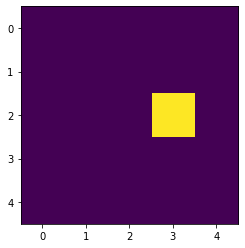

In [162]:
nx = 5

v = np.zeros([nx,nx,nx])
v[2,3,0] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,0])

In [163]:
x_freq = np.fft.fftfreq(nx)
y_freq = np.fft.fftfreq(nx)
z_freq = np.fft.fftfreq(nx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')


In [164]:
angles = np.array([0,0,0])

vp, Xp, Yp, Zp = project(v, X, Y, Z, angles, "nn")

In [273]:
(X[:,:,0])

array([[ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2]])

In [274]:
(Y[:,:,0])

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4,  0.4,  0.4],
       [-0.4, -0.4, -0.4, -0.4, -0.4],
       [-0.2, -0.2, -0.2, -0.2, -0.2]])

In [275]:
v[:,:,0]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Do the steps in project

So far: angles = 0 is OK

In [306]:
angles = np.array([0,0,np.pi/2])


X_r, Y_r,Z_r = rotate(X, Y, Z, angles)

In [307]:
np.fft.fftshift(X_r[:,:,0])

array([[ 4.0000000e-01,  4.0000000e-01,  4.0000000e-01,  4.0000000e-01,
         4.0000000e-01],
       [ 2.0000000e-01,  2.0000000e-01,  2.0000000e-01,  2.0000000e-01,
         2.0000000e-01],
       [-2.4492936e-17, -1.2246468e-17,  0.0000000e+00,  1.2246468e-17,
         2.4492936e-17],
       [-2.0000000e-01, -2.0000000e-01, -2.0000000e-01, -2.0000000e-01,
        -2.0000000e-01],
       [-4.0000000e-01, -4.0000000e-01, -4.0000000e-01, -4.0000000e-01,
        -4.0000000e-01]])

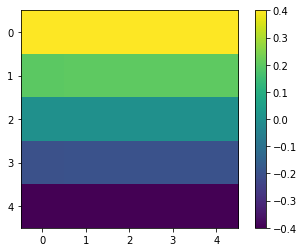

In [308]:
plt.imshow(np.fft.fftshift(X_r[:,:,0])); plt.colorbar()

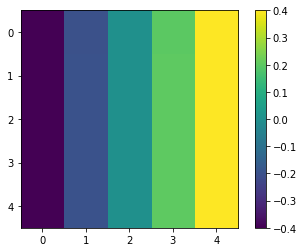

In [309]:
plt.imshow(np.fft.fftshift(Y_r[:,:,0])); plt.colorbar()

In [310]:
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])
slice_coords.T

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.2246468e-17,  2.0000000e-01,  0.0000000e+00],
       [ 2.4492936e-17,  4.0000000e-01,  0.0000000e+00],
       [-2.4492936e-17, -4.0000000e-01,  0.0000000e+00],
       [-1.2246468e-17, -2.0000000e-01,  0.0000000e+00],
       [-2.0000000e-01,  1.2246468e-17,  0.0000000e+00],
       [-2.0000000e-01,  2.0000000e-01,  0.0000000e+00],
       [-2.0000000e-01,  4.0000000e-01,  0.0000000e+00],
       [-2.0000000e-01, -4.0000000e-01,  0.0000000e+00],
       [-2.0000000e-01, -2.0000000e-01,  0.0000000e+00],
       [-4.0000000e-01,  2.4492936e-17,  0.0000000e+00],
       [-4.0000000e-01,  2.0000000e-01,  0.0000000e+00],
       [-4.0000000e-01,  4.0000000e-01,  0.0000000e+00],
       [-4.0000000e-01, -4.0000000e-01,  0.0000000e+00],
       [-4.0000000e-01, -2.0000000e-01,  0.0000000e+00],
       [ 4.0000000e-01, -2.4492936e-17,  0.0000000e+00],
       [ 4.0000000e-01,  2.0000000e-01,  0.0000000e+00],
       [ 4.0000000e-01,  4.0000

In [311]:
X_r[:,:,0]

array([[ 0.0000000e+00,  1.2246468e-17,  2.4492936e-17, -2.4492936e-17,
        -1.2246468e-17],
       [-2.0000000e-01, -2.0000000e-01, -2.0000000e-01, -2.0000000e-01,
        -2.0000000e-01],
       [-4.0000000e-01, -4.0000000e-01, -4.0000000e-01, -4.0000000e-01,
        -4.0000000e-01],
       [ 4.0000000e-01,  4.0000000e-01,  4.0000000e-01,  4.0000000e-01,
         4.0000000e-01],
       [ 2.0000000e-01,  2.0000000e-01,  2.0000000e-01,  2.0000000e-01,
         2.0000000e-01]])

In [312]:
Y_r[:,:,0]

array([[ 0.0000000e+00,  2.0000000e-01,  4.0000000e-01, -4.0000000e-01,
        -2.0000000e-01],
       [ 1.2246468e-17,  2.0000000e-01,  4.0000000e-01, -4.0000000e-01,
        -2.0000000e-01],
       [ 2.4492936e-17,  2.0000000e-01,  4.0000000e-01, -4.0000000e-01,
        -2.0000000e-01],
       [-2.4492936e-17,  2.0000000e-01,  4.0000000e-01, -4.0000000e-01,
        -2.0000000e-01],
       [-1.2246468e-17,  2.0000000e-01,  4.0000000e-01, -4.0000000e-01,
        -2.0000000e-01]])

In [318]:
X[:,:,0]

array([[ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2],
       [ 0. ,  0.2,  0.4, -0.4, -0.2]])

In [319]:
Y[:,:,0]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4,  0.4,  0.4],
       [-0.4, -0.4, -0.4, -0.4, -0.4],
       [-0.2, -0.2, -0.2, -0.2, -0.2]])

In [313]:
v[:,:,0]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [314]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, v,"nn")
slice_interp_2d = slice_interp.reshape(X_r.shape[0], X_r.shape[1])

In [315]:
slice_interp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

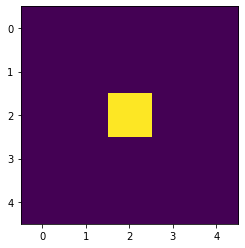

In [316]:
plt.imshow(slice_interp_2d)

In [317]:
slice_interp_2d

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])